# Complexity from simplicity

Suppose we have a grid of binary elements i.e. each cell can be viewed as on or off, and the grid can be initialized to any 2D binary configuration. What happens when we define simple rules on how to change each cell given the state of other cells? These sets of rules that describe how to change states of objects are called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton).

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'binary'
plt.rcParams['figure.figsize'] = (8, 10)

#### The grid
Let's initialize our grid to have one cell 'turned on' in the top row, middle column.

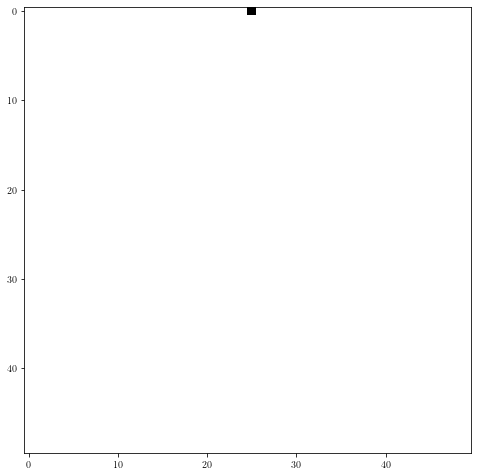

In [9]:
# initialize the grid
grid = np.zeros((50, 50))
grid[0, 50 // 2] = 1

_ = plt.imshow(grid)

#### Rules
Now let's define some simple rules for changing a cell:

* If the three cells above a cell have the pattern 111 (all black), change the cell to white.
* If the three cells above a cell have the pattern 110, change the cell to white.
* If the three cells above a cell have the pattern 101, change the cell to white.
* If the three cells above a cell have the pattern 000 (all white), change the cell to white.
* If the three cells above a cell have the pattern 100, change the cell to black.
* If the three cells above a cell have the pattern 011, change the cell to black.
* If the three cells above a cell have the pattern 010, change the cell to black.
* If the three cells above a cell have the pattern 001, change the cell to black.

In [10]:
def rule1(pattern):
    """Implements the rules described above. Returns 1 or 0
    
    Args:
        pattern (np.array): input pattern
    """
    if any([
        (pattern != [1, 1, 1]).sum() == 0,
        (pattern != [1, 1, 0]).sum() == 0,
        (pattern != [1, 0, 1]).sum() == 0,
        (pattern != [0, 0, 0]).sum() == 0
    ]):
        return 0
    else:  # covers all other cases since our rule covers every possible 3-bit string
        return 1


def update(grid, rule):
    """Applies the update rules to an input grid
    
    Args:
        grid (np.ndarray): binary grid
        rule (callable): rule function
    """
    # first, make a grid copy
    G = np.copy(grid)
    H, W = G.shape
    
    # update the grid
    for row in range(1, H):
        for col in range(1, W - 1):
            G[row, col] = rule(G[row - 1, col - 1: col + 2])
            
    return G

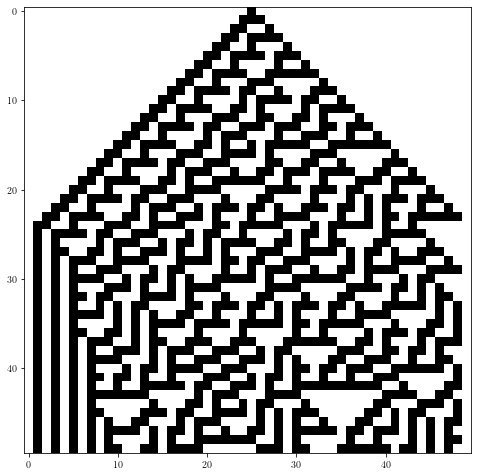

In [11]:
# let's see what happens
G = update(grid, rule1)

_ = plt.imshow(G)

Interesting pattern... let's see what happens when we take the same grid initialization but make it bigger.

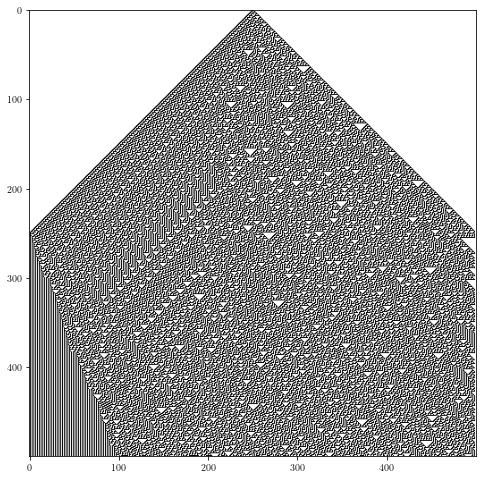

In [12]:
# initialize a giant grid
big_grid = np.zeros((500, 500))
big_grid[0, 500 // 2] = 1

# this may take a while...
big_G = update(big_grid, rule1)

_ = plt.imshow(big_G)

Lets define another 3-bit rule:
* If the three cells above a cell have the pattern 111 (all black), change the cell to white.
* If the three cells above a cell have the pattern 010, change the cell to white.
* If the three cells above a cell have the pattern 101, change the cell to white.
* If the three cells above a cell have the pattern 000 (all white), change the cell to white.
* If the three cells above a cell have the pattern 100, change the cell to black.
* If the three cells above a cell have the pattern 011, change the cell to black.
* If the three cells above a cell have the pattern 110, change the cell to black.
* If the three cells above a cell have the pattern 001, change the cell to black.

If you have a keen eye, you might notice I just swapped 2nd rule from before with the 7th rule.

In [13]:
def rule2(pattern):
    """Implements the rules described above. Returns 1 or 0
    
    Args:
        pattern (np.array): input pattern
    """
    if any([
        (pattern != [1, 1, 1]).sum() == 0,
        (pattern != [0, 1, 0]).sum() == 0,
        (pattern != [1, 0, 1]).sum() == 0,
        (pattern != [0, 0, 0]).sum() == 0
    ]):
        return 0
    else:  # covers all other cases since our rule covers every possible 3-bit string
        return 1

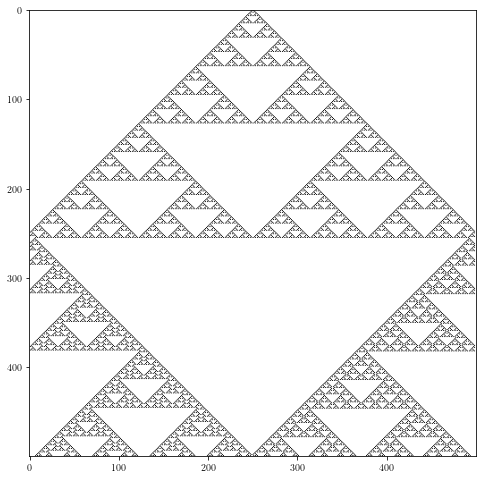

In [14]:
G_rule2 = update(big_grid, rule2)

_ = plt.imshow(G_rule2)

#### Random initialization
Now what if we initialized the grid randomly? For every cell in the grid let's flip a coin, if the coin lands heads then turn the cell on, if the coin lands tails then turn it off. Mathematically, we can model this process as a sampling a number from [0, 1] for every cell, and if that number is above a threshold we set (the probability of heads) then we turn the cell on (and vice versa if the sampled number is below the threshold). This is also known as a [bernoulli process](https://en.wikipedia.org/wiki/Bernoulli_process).

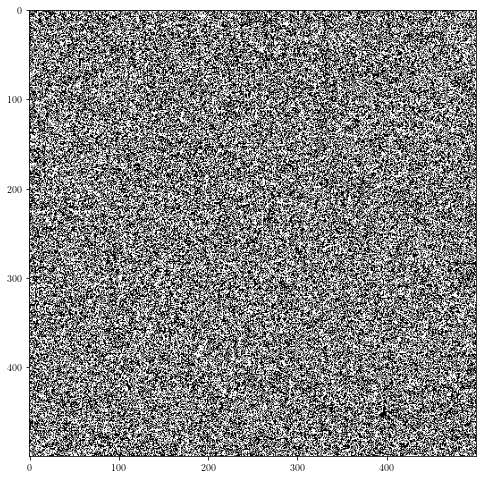

In [15]:
# sample a uniform random number between [0, 1]
rand_grid = np.random.rand(500, 500)

# threshold (for now, we'll consider a fair coin: probability of heads = threshold = 1/2)
rand_grid[rand_grid >= 0.5] = 1
rand_grid[rand_grid < 0.5] = 0

_ = plt.imshow(rand_grid)

As we might expect, we see random white noise. Now let's apply the rules.

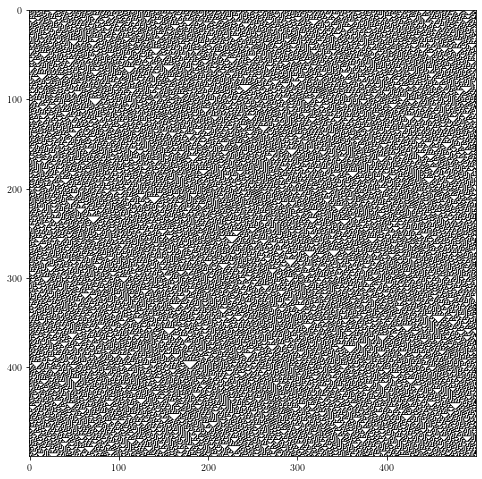

In [16]:
rand_rule1 = update(rand_grid, rule1)

_ = plt.imshow(rand_rule1)

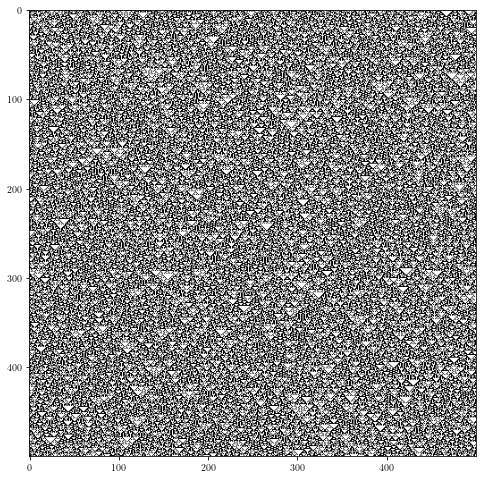

In [22]:
rand_rule2 = update(rand_grid, rule2)

_ = plt.imshow(rand_rule2)

Now let's define yet another rule:
* If the three cells above a cell have the pattern 111 (all black), change the cell to white.
* If the three cells above a cell have the pattern 100, change the cell to white.
* If the three cells above a cell have the pattern 000 (all white), change the cell to white.
* If the three cells above a cell have the pattern 010, change the cell to black.
* If the three cells above a cell have the pattern 101, change the cell to black.
* If the three cells above a cell have the pattern 011, change the cell to black.
* If the three cells above a cell have the pattern 110, change the cell to black.
* If the three cells above a cell have the pattern 001, change the cell to black.

Again, only slight change to the previous rule set.

In [23]:
def rule3(pattern):
    """Implements the rules described above. Returns 1 or 0
    
    Args:
        pattern (np.array): input pattern
    """
    if any([
        (pattern != [1, 1, 1]).sum() == 0,
        (pattern != [1, 0, 0]).sum() == 0,
        (pattern != [0, 0, 0]).sum() == 0
    ]):
        return 0
    else:  # covers all other cases since our rule covers every possible 3-bit string
        return 1

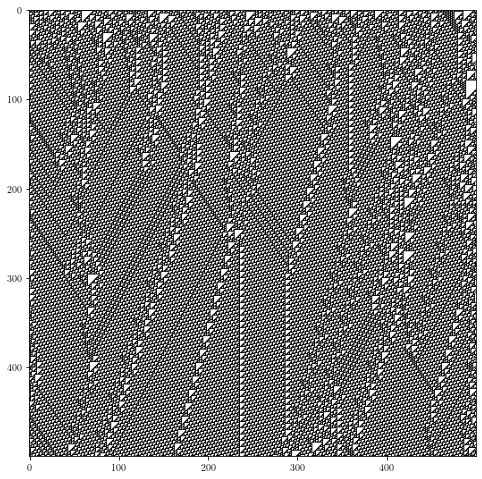

In [24]:
rand_rule3 = update(rand_grid, rule3)

_ = plt.imshow(rand_rule3)

As a result, there's almost a crystalline structure that emerges! In general, we can think of assigning white or black *at random* to each of the $2 ^3 = 8$ 3-bit update rules to explore the space (i.e. randomly sample the space) of *all* possible 3-bit update rules!

In [84]:
def random_rule():
    """Closure for creating a rule with random 0/1 assignments for 3-bit patterns
    """
    # create random sequence of rule outputs
    outputs = np.random.randint(0, 2, size=8)
    
    # all possible 3-bit strings
    strings = [
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 1],
        [1, 1, 0],
        [1, 0, 1],
        [1, 1, 1]
    ]

    # print the output rule
    print("Update rules:")
    print('====='.join('===' for _ in strings))
    print('\t'.join(''.join(str(bit) for bit in s) for s in strings))
    print('\t'.join(f" {bit} " for bit in outputs))
    
    def _rule(pattern):
        """Implements the rules described above. Returns 1 or 0

        Args:
            pattern (np.array): input pattern
        """
        # check for matches btwn input pattern and all bitstrings
        for i in range(len(strings)):
            if (pattern != strings[i]).sum() == 0:
                return outputs[i]
    return _rule

Update rules:
000	001	010	100	011	110	101	111
 1 	 0 	 0 	 0 	 1 	 0 	 1 	 0 


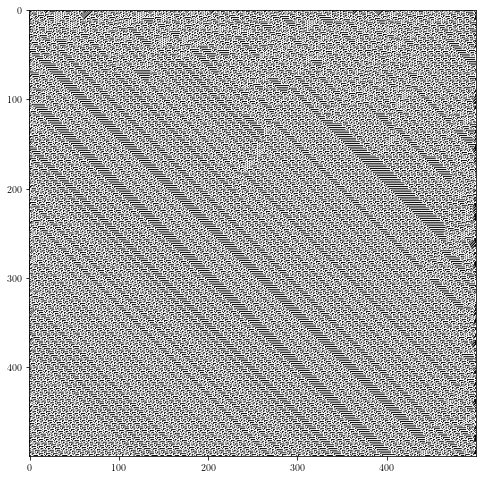

In [101]:
random_G = update(rand_grid, random_rule())

_ = plt.imshow(random_G)

With these random rules, you may sometimes see boring patterns of straight lines or some incredible emergent structure. It's like playing the cellular automaton lottery! Here's a particularly interesting rule that I recorded from the output of the `random_rule` function. The amazing thing about this rule is that it exhibits a 3-D structure remniscent of a vertex of a cube. Try it out:

|000|001|010|100|011|110|101|111|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0|0|1|1|0|1|1|

And to think that all of this comes from flipping 1's to 0's and 0's to 1's...